In [1]:
# 구글 드라이브 마운트
from google.colab import drive
drive.mount("/gdrive")
%cd /gdrive/MyDrive/투빅스/week9

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/투빅스/week9


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [3]:
movies = pd.read_csv('./ml-latest-small/movies.csv')
links = pd.read_csv('./ml-latest-small/links.csv')
ratings = pd.read_csv('./ml-latest-small/ratings.csv')
tags = pd.read_csv('./ml-latest-small/tags.csv')

In [4]:
print(movies.shape)
movies.head()

(9742, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


* 영화 정보가 담긴 데이터
* 타이틀(title), 장르(genres) 

In [6]:
print(links.shape)
links.head()

(9742, 3)


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [7]:
links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9742 non-null   int64  
 1   imdbId   9742 non-null   int64  
 2   tmdbId   9734 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 228.5 KB


In [8]:
print(ratings.shape)
ratings.head()

(100836, 4)


,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
ratings['userId'].nunique()

610

* 총 유저는 610명
* 사용자마다 관람한 영화에 대한 평점

In [11]:
print(tags.shape)
tags.head()

(3683, 4)


,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [12]:
tags.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   userId     3683 non-null   int64 
 1   movieId    3683 non-null   int64 
 2   tag        3683 non-null   object
 3   timestamp  3683 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 115.2+ KB


* 사용자가 영화를 관람한 후 남긴 리뷰로부터 추출된 태그 데이터

## EDA

In [13]:
# 전체 장르 종류 파악 
all_genres = [x.split('|') for x in movies['genres'].values]
genres = list(set(list(chain(*all_genres))))

In [14]:
print(f'장르 종류 : {len(genres)}개')
print(genres)

장르 종류 : 20개
['War', 'Children', 'Musical', 'Animation', 'Thriller', 'Romance', 'Crime', '(no genres listed)', 'IMAX', 'Mystery', 'Documentary', 'Drama', 'Fantasy', 'Western', 'Comedy', 'Film-Noir', 'Horror', 'Adventure', 'Action', 'Sci-Fi']


* 장르 : 20개  
  * Action
  * Adventure
  * Animation
  * Children's
  * Comedy
  * Crime
  * Documentary
  * Drama
  * Fantasy
  * Film-Noir
  * Horror
  * IMAX
  * Musical
  * Mystery
  * Romance
  * Sci-Fi
  * Thriller
  * War
  * Western
  * (no genres listed)

In [15]:
genres = movies['genres'].str.get_dummies(sep='|')
genres.head()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
# 장르별 상관관계 
# 어떤 영화가 장르 A를 갖고 있을 때, 장르 B도 갖고 있는지 확인 
genres.corr()

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
(no genres listed),1.000000,-0.028442,-0.022840,-0.015309,-0.016005,-0.046878,-0.022171,-0.012871,-0.053277,-0.017447,-0.005618,-0.019769,-0.007599,-0.011151,-0.014794,-0.026195,-0.019792,-0.029073,-0.011956,-0.007816
Action,-0.028442,1.000000,0.291949,0.029659,-0.049652,-0.148968,0.154471,-0.099463,-0.152964,0.059931,-0.031649,-0.035443,0.131864,-0.083331,-0.028515,-0.146670,0.233475,0.199042,0.076289,0.021600
Adventure,-0.022840,0.291949,1.000000,0.211472,0.273931,-0.055215,-0.085988,-0.075111,-0.156327,0.262511,-0.030140,-0.098423,0.143982,-0.005544,-0.048427,-0.072584,0.181797,-0.035942,0.010195,0.036136
Animation,-0.015309,0.029659,0.211472,1.000000,0.437376,0.029079,-0.069847,-0.050144,-0.160504,0.196895,-0.015555,-0.062464,0.080744,0.111804,-0.030477,-0.061882,0.064093,-0.107822,-0.036990,-0.024378
Children,-0.016005,-0.049652,0.273931,0.437376,1.000000,0.088701,-0.086442,-0.056859,-0.160742,0.234117,-0.025673,-0.083569,0.062011,0.137072,-0.036449,-0.070189,-0.011910,-0.127716,-0.048341,-0.016890
Comedy,-0.046878,-0.148968,-0.055215,0.029079,0.088701,1.000000,-0.075282,-0.131657,-0.283472,-0.005708,-0.070710,-0.133382,-0.056627,0.045466,-0.127209,0.153088,-0.132400,-0.286289,-0.095919,-0.039622
Crime,-0.022171,0.154471,-0.085988,-0.069847,-0.086442,-0.075282,1.000000,-0.073955,0.063005,-0.086254,0.137141,-0.063805,-0.020892,-0.056850,0.124138,-0.097444,-0.095166,0.265196,-0.059585,-0.022997
Documentary,-0.012871,-0.099463,-0.075111,-0.050144,-0.056859,-0.131657,-0.073955,1.000000,-0.173925,-0.060473,-0.020645,-0.069364,0.003381,-0.005664,-0.050168,-0.093597,-0.072736,-0.104346,-0.013378,-0.024915
Drama,-0.053277,-0.152964,-0.156327,-0.160504,-0.160742,-0.283472,0.063005,-0.173925,1.000000,-0.106337,0.024256,-0.187391,-0.063293,-0.038022,0.027635,0.122454,-0.158325,-0.008267,0.135067,-0.025060
Fantasy,-0.017447,0.059931,0.262511,0.196895,0.234117,-0.005708,-0.086254,-0.060473,-0.106337,1.000000,-0.023962,0.012336,0.102962,0.050524,0.014768,-0.000635,0.046094,-0.057807,-0.043959,-0.021441


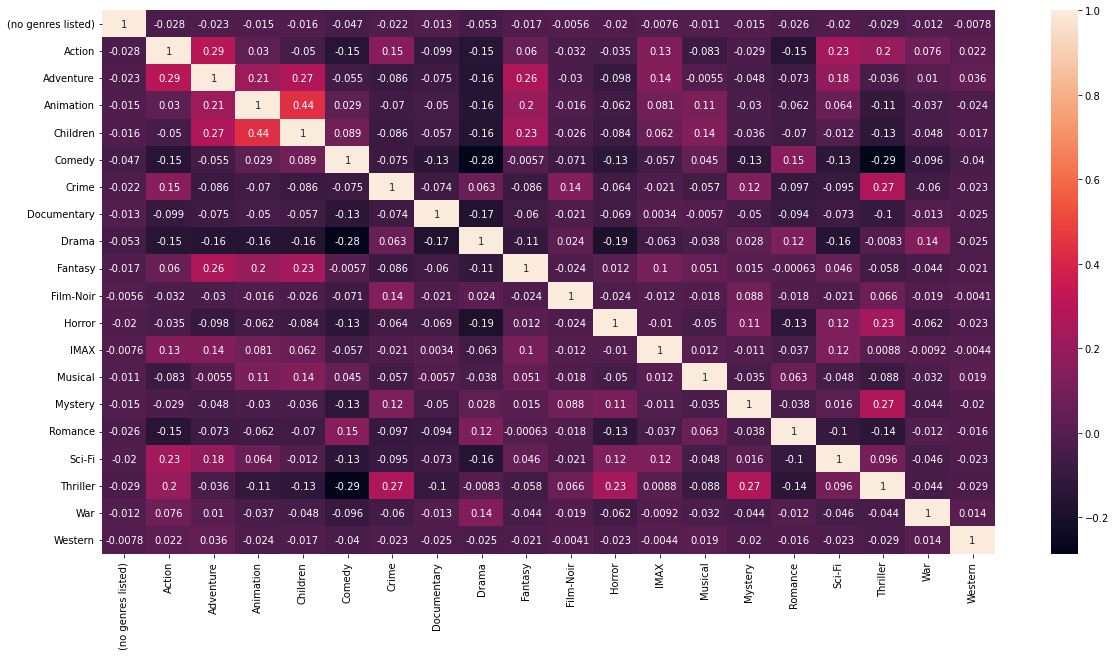

In [17]:
plt.figure(figsize=(20, 10)) 
sns.heatmap(genres.corr(), annot=True)
plt.show()

1에 가까움: 두 장르가 자주 같이 출현한다는 것  
-1에 가까움: 두 장르가 아주 드물게 출현 혹은 겹치는 영역이 없다는 것

* 애니메이션과 어린이 장르가 가장 높은 상관관계를 보임
* 코미디와 스릴러는 가장 낮은 상관관계를 보임

In [18]:
title = movies[['title', 'genres']]
title['year'] = title['title'].str.extract('(\(\d\d\d\d\))')
title.head()

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,(1995)
1,Jumanji (1995),Adventure|Children|Fantasy,(1995)
2,Grumpier Old Men (1995),Comedy|Romance,(1995)
3,Waiting to Exhale (1995),Comedy|Drama|Romance,(1995)
4,Father of the Bride Part II (1995),Comedy,(1995)


In [19]:
# 연도가 제대로 표시 되지 않은 영화가 있는지 nan 확인 
title.isna().sum()

title      0
genres     0
year      13
dtype: int64

In [20]:
title[title['year'].isnull()]

,title,genres,year
6059,Babylon 5,Sci-Fi,NaN
9031,Ready Player One,Action|Sci-Fi|Thriller,NaN
9091,Hyena Road,(no genres listed),NaN
9138,The Adventures of Sherlock Holmes and Doctor W...,(no genres listed),NaN
9179,Nocturnal Animals,Drama|Thriller,NaN
9259,Paterson,(no genres listed),NaN
9367,Moonlight,Drama,NaN
9448,The OA,(no genres listed),NaN
9514,Cosmos,(no genres listed),NaN
9515,Maria Bamford: Old Baby,(no genres listed),NaN


In [21]:
title.dropna(axis=0, inplace=True)
title['year'] = title['year'].apply(lambda x: x.replace('(','').replace(')',''))
title.head()

,title,genres,year
0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,Jumanji (1995),Adventure|Children|Fantasy,1995
2,Grumpier Old Men (1995),Comedy|Romance,1995
3,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,Father of the Bride Part II (1995),Comedy,1995


In [22]:
# 연도별 영화 개수 
year_freq = title.groupby('year')['title'].count()
year_freq.describe()

count    106.000000
mean      91.783019
std      102.227757
min        1.000000
25%       16.000000
50%       39.500000
75%      151.500000
max      311.000000
Name: title, dtype: float64

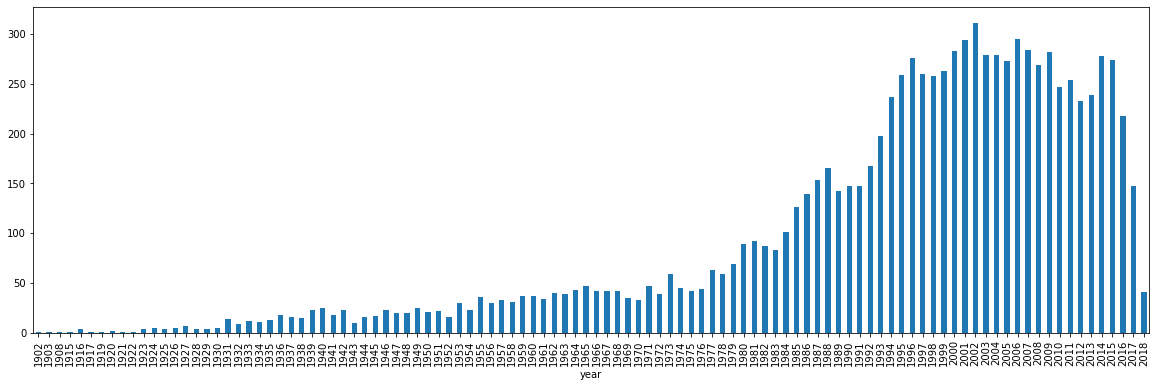

In [23]:
#연도별 영화 개수 분포 확인
year_freq.plot(kind='bar', figsize=(20,6))
plt.xticks(rotation=90)
plt.show()

* 90년대 이후 영화 수 급증

In [24]:
# 데이터 merge
df = pd.merge(movies, ratings, on='movieId')
df.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [25]:
df.isna().sum()

movieId      0
title        0
genres       0
userId       0
rating       0
timestamp    0
dtype: int64

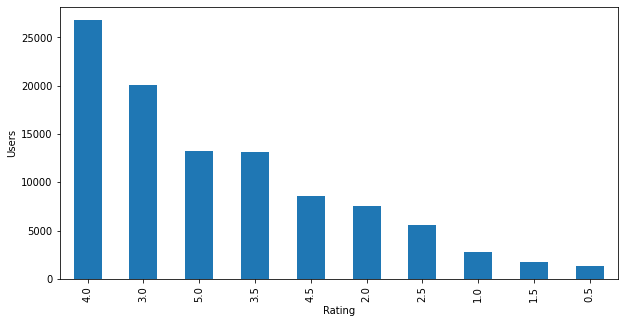

In [26]:
df['rating'].value_counts().plot(kind='bar', figsize=(10,5))
plt.ylabel('Users')
plt.xlabel('Rating')
plt.show()

* 4점을 준 유저가 가장 많음

In [27]:
# 가장 많은 관심(평가)를 받은 영화 top5
top5 = df.groupby('title')['rating'].count().reset_index()
top5 = top5.sort_values(by='rating', ascending=False)
top5.columns = ['title','number_users']
top5.head(5)

,title,number_users
3158,Forrest Gump (1994),329
7593,"Shawshank Redemption, The (1994)",317
6865,Pulp Fiction (1994),307
7680,"Silence of the Lambs, The (1991)",279
5512,"Matrix, The (1999)",278


In [28]:
movie_user = pd.DataFrame({
    'num_users': df.groupby('title')['userId'].count(),
    'avg_ratings': df.groupby('title')['rating'].mean(),
    'std_ratings': df.groupby('title')['rating'].std()
})
movie_user = movie_user.reset_index()
movie_user = movie_user.sort_values(by='num_users', ascending=False)
movie_user.head(5)

,title,num_users,avg_ratings,std_ratings
3158,Forrest Gump (1994),329,4.164134,0.831244
7593,"Shawshank Redemption, The (1994)",317,4.429022,0.713019
6865,Pulp Fiction (1994),307,4.197068,0.951997
7680,"Silence of the Lambs, The (1991)",279,4.161290,0.853983
5512,"Matrix, The (1999)",278,4.192446,0.975243


* 사용자가 많이 본 영화일수록 평점이 좋은 편이다.

In [29]:
movie_user.describe()

,num_users,avg_ratings,std_ratings
count,9719.000000,9719.000000,6278.000000
mean,10.375141,3.262388,0.838950
std,22.406220,0.870004,0.391460
min,1.000000,0.500000,0.000000
25%,1.000000,2.800000,0.629153
50%,3.000000,3.416667,0.837921
75%,9.000000,3.910357,1.051337
max,329.000000,5.000000,3.181981


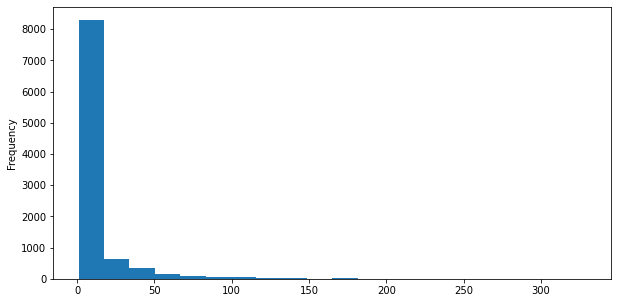

In [30]:
movie_user['num_users'].plot(kind='hist', figsize=(10,5), bins=20)
plt.show()

In [31]:
# 1명만 평점을 준 영화
movie_user['title'][movie_user.num_users == 1].count()

3441

In [32]:
# 50 미만의 영화
movie_user['title'][movie_user.num_users < 50].count()

9269

* 대부분 영화들의 평점이 50개 이하 

## Memory Based CF

참고 : https://jeonsm9575.tistory.com/65

### 아이템 기반 협업 필터링 (Item Based CF)

In [33]:
# NaN 값 => 0으로 대체 
ratings_matrix = df.pivot_table('rating', index='userId', columns='title', fill_value=0)
ratings_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,4.0,0
2,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
3,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
4,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0
5,0,0,0.0,0,0,0.0,0.0,0,0.0,0.0,...,0.0,0.0,0.0,0,0,0.0,0.0,0.0,0.0,0


In [34]:
# 영화 간 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
 
# 영화 간 유사도 측정을 위해 행과열을 바꿔주는 transpose( )함수 사용 후  cosine_similarity( )를 사용
item_sim = cosine_similarity(ratings_matrix.T, ratings_matrix.T)
item_sim = pd.DataFrame(item_sim, ratings_matrix.columns, ratings_matrix.columns)

print(item_sim.shape)
item_sim.head()

(9719, 9719)


title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.141653,0.0,...,0.0,0.342055,0.543305,0.707107,0.0,0.0,0.139431,0.327327,0.0,0.0
'Hellboy': The Seeds of Creation (2004),0.0,1.000000,0.707107,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Round Midnight (1986),0.0,0.707107,1.000000,0.000000,0.000000,0.0,0.176777,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Salem's Lot (2004),0.0,0.000000,0.000000,1.000000,0.857493,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
'Til There Was You (1997),0.0,0.000000,0.000000,0.857493,1.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0


In [35]:
# 사용자들이 가장 많이 본 영화인 'Forrest Gump (1994)'와 유사도가 높은 상위 5개 영화 
item_sim["Forrest Gump (1994)"].sort_values(ascending=False)[1:6]

title
Shawshank Redemption, The (1994)    0.712993
Jurassic Park (1993)                0.688259
Pulp Fiction (1994)                 0.685544
Braveheart (1995)                   0.643090
Silence of the Lambs, The (1991)    0.639463
Name: Forrest Gump (1994), dtype: float64

In [36]:
# '아이템 기반 최근접 이웃 협업 필터링'으로 개인화된 영화 추천
# 특정 영화와 비슷한 유사도를 가지는 영화에 대해서만 유사도 적용 

n = 20 # 이웃의 수 설정

ratings_arr = ratings_matrix.values
item_sim_arr = item_sim.values

pred = np.zeros(ratings_arr.shape)

for col in range(ratings_arr.shape[1]):
    top_n = [np.argsort(item_sim_arr[:, col])[:-n-1:-1]] # 유사도가 큰 순서대로 index 반환
    for row in range(ratings_arr.shape[0]): # 예측 평점 계산 
        pred[row, col] = item_sim_arr[col, :][top_n].dot(ratings_arr[row,:][top_n].T) 
        pred[row, col] /= np.sum(np.abs(item_sim_arr[col, :][top_n]))
        
pred = pd.DataFrame(pred, ratings_matrix.index, ratings_matrix.columns)
pred

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.220798,0.000000,0.000000,1.677291,0.284372
2,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.220798,0.000000,0.000000,0.194828,0.000000
5,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.0,0.149633,0.0,0.418273,0.16678,0.0,0.130033,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.344930,0.268465,0.000000,0.694944,0.189602
607,0.0,0.000000,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.000000,0.000000,0.000000,0.0,0.194948,0.000000,0.000000,0.000000,0.000000
608,0.0,0.000000,0.0,0.159451,0.00000,0.0,0.243703,0.0,0.000000,0.0,...,0.0,0.129289,0.000000,0.112856,0.0,1.587302,2.988072,0.175489,0.702430,0.000000


In [37]:
# 성능 평가 
from sklearn.metrics import mean_squared_error
 
predict = pred.values[ratings_matrix.values.nonzero()].flatten()
actual = ratings_matrix.values[ratings_matrix.values.nonzero()].flatten()
mse = mean_squared_error(predict, actual)

print('아이템 기반 Top-20 인접 이웃 MSE: ', mse)

아이템 기반 Top-20 인접 이웃 MSE:  3.6949827608772314


In [38]:
# 영화 추천 

# 특정 사용자(userid = 77)의 영화 관람 정보 
user_rating = ratings_matrix.loc[77,:]
    
# 이미 관람한 영화 list (user_rating > 0, user_rating이 0이하일 경우 미관람) 
already_seen = user_rating[user_rating > 0].index.tolist()
   
# 미관람한 영화 list (already_seen에 해당하는 영화 제외)
unseen_list = [movie for movie in ratings_matrix.columns.tolist() if movie not in already_seen]
    
# 미관람한 영화 중 10개(가장 평점 높은 순)의 영화를 추천 
recomm_movies = pred.loc[77, unseen_list].sort_values(ascending=False)[:10]
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
recomm_movies

,pred_score
title,
X-Men (2000),2.149077
Minority Report (2002),1.876254
Harry Potter and the Sorcerer's Stone (a.k.a. Harry Potter and the Philosopher's Stone) (2001),1.857990
Kill Bill: Vol. 1 (2003),1.852775
WALL·E (2008),1.843030
"Monsters, Inc. (2001)",1.842112
Star Wars: Episode I - The Phantom Menace (1999),1.741880
"Matrix Reloaded, The (2003)",1.734247
Ocean's Eleven (2001),1.726797


### 유저 기반 협업 필터링 (User Based CF)

In [39]:
# 유저 간 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity
 
user_sim = cosine_similarity(ratings_matrix, ratings_matrix)
user_sim = pd.DataFrame(user_sim, ratings_matrix.index, ratings_matrix.index)

print(user_sim.shape)
user_sim.head()

(610, 610)


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.027283,0.059720,0.194395,0.129080,0.128152,0.158744,0.136968,0.064263,0.016875,...,0.080554,0.164455,0.221486,0.070669,0.153625,0.164191,0.269389,0.291097,0.093572,0.145321
2,0.027283,1.000000,0.000000,0.003726,0.016614,0.025333,0.027585,0.027257,0.000000,0.067445,...,0.202671,0.016866,0.011997,0.000000,0.000000,0.028429,0.012948,0.046211,0.027565,0.102427
3,0.059720,0.000000,1.000000,0.002251,0.005020,0.003936,0.000000,0.004941,0.000000,0.000000,...,0.005048,0.004892,0.024992,0.000000,0.010694,0.012993,0.019247,0.021128,0.000000,0.032119
4,0.194395,0.003726,0.002251,1.000000,0.128659,0.088491,0.115120,0.062969,0.011361,0.031163,...,0.085938,0.128273,0.307973,0.052985,0.084584,0.200395,0.131746,0.149858,0.032198,0.107683
5,0.129080,0.016614,0.005020,0.128659,1.000000,0.300349,0.108342,0.429075,0.000000,0.030611,...,0.068048,0.418747,0.110148,0.258773,0.148758,0.106435,0.152866,0.135535,0.261232,0.060792


In [40]:
# 77번 유저와 유사도가 높은 다른 유저 5명 
user_sim.loc[77].sort_values(ascending=False)[1:6]

userId
399    0.469695
30     0.448756
407    0.429372
189    0.401354
25     0.381594
Name: 77, dtype: float64

In [41]:
n = 20 # 이웃의 수 설정

ratings_arr = ratings_matrix.values
user_sim_arr = user_sim.values

pred = np.zeros(ratings_arr.shape)

for row in range(ratings_arr.shape[0]):
    top_n = [np.argsort(user_sim_arr[:, row])[:-n-1:-1]] # 유사도가 큰 순서대로 index 반환
    for col in range(ratings_arr.shape[1]): # 예측 평점 계산 
        pred[row, col] = user_sim_arr[row, :][top_n].dot(ratings_arr[ : ,col][top_n].T) 
        pred[row, col] /= np.sum(np.abs(user_sim_arr[row, :][top_n]))
        
pred = pd.DataFrame(pred, ratings_matrix.index, ratings_matrix.columns)
pred

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,0.000000,0.0,0.000000,0.0,0.0,0.0,0.689674,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.180607,0.000000,0.000000,1.045333,0.000000
2,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.120536,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.117236,0.0,0.0,0.0,0.425156,0.000000,0.000000,0.000000,...,0.000000,0.077407,0.000000,0.000000,0.0,0.126949,0.000000,0.000000,0.449180,0.033057
4,0.000000,0.0,0.000000,0.0,0.0,0.0,0.041972,0.125916,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.736009,0.000000,0.000000,0.583725,0.000000
5,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.000000,0.0,0.000000,0.0,0.0,0.0,0.560119,0.171508,0.886871,0.405252,...,0.000000,0.149493,0.000000,0.000000,0.0,1.576086,0.438179,0.000000,0.772510,0.000000
607,0.000000,0.0,0.000000,0.0,0.0,0.0,0.576976,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.576921,0.147062,0.000000,0.381726,0.000000
608,0.000000,0.0,0.000000,0.0,0.0,0.0,0.468492,0.000000,0.497678,0.259970,...,0.000000,0.400312,0.131464,0.131464,0.0,1.386702,1.320135,0.103546,0.700010,0.000000


In [42]:
# 성능 평가 
from sklearn.metrics import mean_squared_error
 
predict = pred.values[ratings_matrix.values.nonzero()].flatten()
actual = ratings_matrix.values[ratings_matrix.values.nonzero()].flatten()
mse = mean_squared_error(predict, actual)

print('유저 기반 Top-20 인접 이웃 MSE: ', mse)

유저 기반 Top-20 인접 이웃 MSE:  4.669735066659907


In [43]:
# 영화 추천 

# 특정 사용자(userid = 77)의 영화 관람 정보 
user_rating = ratings_matrix.loc[77,:]
    
# 이미 관람한 영화 list (user_rating > 0, user_rating이 0이하일 경우 미관람) 
already_seen = user_rating[user_rating > 0].index.tolist()
   
# 미관람한 영화 list (already_seen에 해당하는 영화 제외)
unseen_list = [movie for movie in ratings_matrix.columns.tolist() if movie not in already_seen]
    
# 미관람한 영화 중 10개(가장 평점 높은 순)의 영화를 추천 
recomm_movies = pred.loc[77, unseen_list].sort_values(ascending=False)[:10]
recomm_movies = pd.DataFrame(data=recomm_movies.values, index=recomm_movies.index, columns=['pred_score'])
recomm_movies

,pred_score
title,
Fight Club (1999),2.422332
Indiana Jones and the Last Crusade (1989),1.959897
"Shawshank Redemption, The (1994)",1.956439
Iron Man (2008),1.856944
"Dark Knight Rises, The (2012)",1.839463
Forrest Gump (1994),1.631607
Saving Private Ryan (1998),1.585552
Terminator 2: Judgment Day (1991),1.570494
Up (2009),1.534131


## Model Based CF

참고 : 
* https://jeonsm9575.tistory.com/66?category=828421
* https://surprise.readthedocs.io/en/stable/matrix_factorization.html

In [44]:
# surprise : 추천 시스템 구축을 위한 전용 패키지
!pip install surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### SVD

In [45]:
from surprise import Reader, Dataset
from surprise import SVD
from surprise import accuracy 
from surprise.model_selection import train_test_split, cross_validate

In [46]:
reader = Reader(rating_scale=(1,5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [47]:
# 데이터셋 split
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

In [48]:
# 모델 학습
model = SVD()
model.fit(trainset)

In [49]:
predictions = model.test(testset)

In [50]:
accuracy.rmse(predictions)

RMSE: 0.8688


0.8688302841726819

In [51]:
accuracy.mse(predictions)

MSE: 0.7549


0.7548660626955832

In [52]:
cross_validate(model, data, measures=['RMSE', 'MSE'], cv = 5, verbose=True)

Evaluating RMSE, MSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8665  0.8802  0.8708  0.8754  0.8743  0.8735  0.0046  
MSE (testset)     0.7509  0.7748  0.7584  0.7663  0.7645  0.7629  0.0080  
Fit time          4.33    5.37    4.75    4.19    4.19    4.57    0.45    
Test time         0.14    0.27    0.12    0.25    0.12    0.18    0.07    


{'test_rmse': array([0.86652459, 0.88020936, 0.87084296, 0.87536521, 0.87434193]),
 'test_mse': array([0.75086487, 0.77476852, 0.75836747, 0.76626425, 0.76447381]),
 'fit_time': (4.325187921524048,
  5.373400449752808,
  4.752323865890503,
  4.192317724227905,
  4.190413475036621),
 'test_time': (0.1369626522064209,
  0.2690756320953369,
  0.12043642997741699,
  0.24567294120788574,
  0.11503958702087402)}